#SENTIMENT ANALYSIS OF ONLINE PRODUCT REVIEWS

#1. Install and Import Dependincies

In [ ]:
!pip install nltk
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

# 2. Importing Dataset

In [ ]:
df = pd.read_csv("/content/Reviews.csv",encoding='cp1252')
df.head()

,id,product,title,rating,reviewText
0,0,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,The Xiaomi Redmi Note 11 T 5G impresses with i...
1,1,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,Phone is good but function are not . Finger pr...
2,2,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,Call recording is difficult and photos by c...
3,3,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,The Redmi Note 11T is an absolute gem of a sma...
4,4,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,Best mobiles are available at cheaper price fo...


In [ ]:
df['reviewText'] = df['reviewText'].str.lower()
df.head()

,id,product,title,rating,reviewText
0,0,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,the xiaomi redmi note 11 t 5g impresses with i...
1,1,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,phone is good but function are not . finger pr...
2,2,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,call recording is difficult and photos by c...
3,3,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,the redmi note 11t is an absolute gem of a sma...
4,4,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,best mobiles are available at cheaper price fo...


In [ ]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')
df.head()

,id,product,title,rating,reviewText
0,0,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,the xiaomi redmi note 11 t 5g impresses with i...
1,1,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,phone is good but function are not finger pri...
2,2,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,call recording is difficult and photos by c...
3,3,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,the redmi note 11t is an absolute gem of a sma...
4,4,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,best mobiles are available at cheaper price fo...


In [ ]:
df['reviewText'] = df['reviewText'].str.replace('\d', '')
df.head()

,id,product,title,rating,reviewText
0,0,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,the xiaomi redmi note t g impresses with its ...
1,1,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,phone is good but function are not finger pri...
2,2,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,call recording is difficult and photos by c...
3,3,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,the redmi note t is an absolute gem of a smart...
4,4,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,best mobiles are available at cheaper price fo...


In [ ]:
sw = stopwords.words('english')
sw[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [ ]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df.head()

,id,product,title,rating,reviewText
0,0,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,xiaomi redmi note g impresses stellar performa...
1,1,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,phone good function finger print voice good
2,2,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,call recording difficult photos camera clear
3,3,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,redmi note absolute gem smartphone deserves ev...
4,4,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,best mobiles available cheaper price features ...


In [ ]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

drops = temp_df[temp_df <= 1]

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df.head()

,id,product,title,rating,reviewText
0,0,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,xiaomi redmi note g performance g capabilities...
1,1,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,phone good function finger print voice good
2,2,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,call recording photos camera clear
3,3,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,redmi note absolute smartphone every one perfo...
4,4,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,best mobiles available price features speaker ...


In [ ]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0    [xiaomi, redmi, note, g, performance, g, capab...
1    [phone, good, function, finger, print, voice, ...
2             [call, recording, photos, camera, clear]
3    [redmi, note, absolute, smartphone, every, one...
4    [best, mobiles, available, price, features, sp...
Name: reviewText, dtype: object

In [ ]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

,id,product,title,rating,reviewText
0,0,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,xiaomi redmi note g performance g capability p...
1,1,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,phone good function finger print voice good
2,2,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,call recording photo camera clear
3,3,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,redmi note absolute smartphone every one perfo...
4,4,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,best mobile available price feature speaker so...


In [ ]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,g,24.00
1,performance,20.00
2,note,16.00
3,redmi,24.00
4,connectivity,3.00


In [ ]:
tf.shape

(349, 2)

In [ ]:
tf["words"].nunique()

349

In [ ]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count   349.00
mean      5.27
std       8.55
min       2.00
5%        2.00
10%       2.00
25%       2.00
50%       3.00
75%       5.00
80%       6.00
90%      10.00
95%      15.00
99%      33.68
max     107.00
Name: tf, dtype: float64

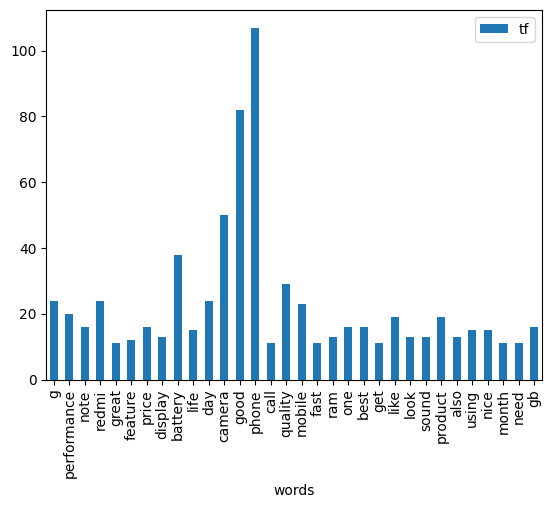

In [ ]:
tf[tf["tf"] > 10].plot.bar(x="words", y="tf")
plt.show()

#Word Cloud

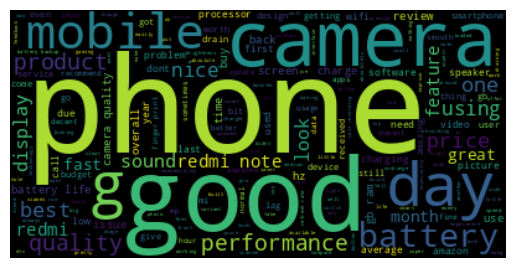

In [ ]:
text = " ".join(i for i in df.reviewText)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Word Cloud

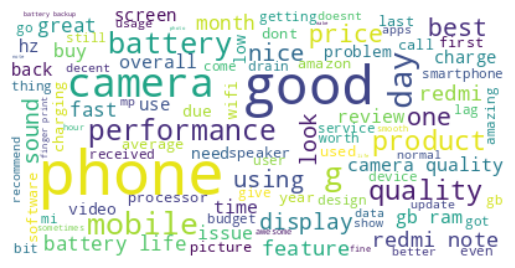

In [ ]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Sentiment Intensity Analyzer

In [ ]:
sia = SentimentIntensityAnalyzer()
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head()

,id,product,title,rating,reviewText,polarity_score
0,0,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,xiaomi redmi note g performance g capability p...,0.94
1,1,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,phone good function finger print voice good,0.70
2,2,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,call recording photo camera clear,0.38
3,3,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,redmi note absolute smartphone every one perfo...,0.81
4,4,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,best mobile available price feature speaker so...,0.34


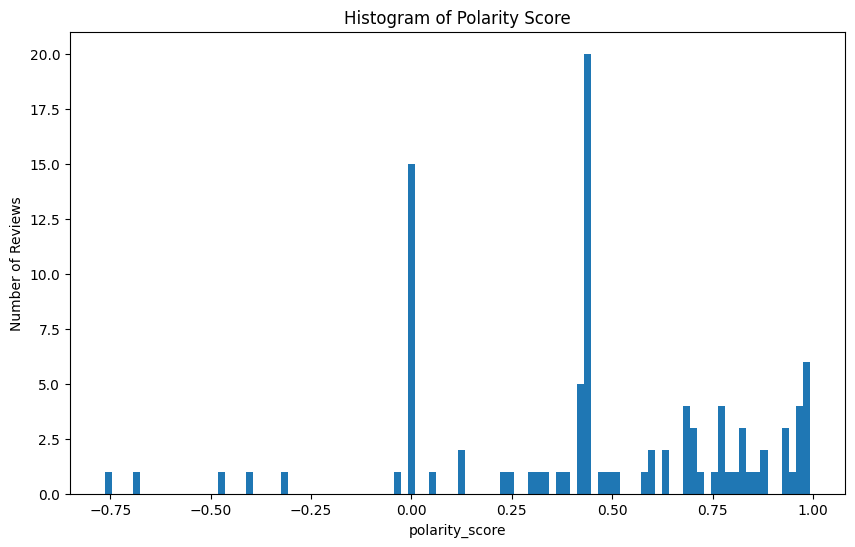

In [ ]:
num_bins = 100
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity_score, num_bins)
plt.xlabel('polarity_score')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [ ]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head()

,id,product,title,rating,reviewText,polarity_score,sentiment_label
0,0,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,xiaomi redmi note g performance g capability p...,0.94,pos
1,1,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,phone good function finger print voice good,0.70,pos
2,2,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,call recording photo camera clear,0.38,pos
3,3,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,redmi note absolute smartphone every one perfo...,0.81,pos
4,4,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,best mobile available price feature speaker so...,0.34,pos


In [ ]:
df["sentiment_label"].value_counts()

pos    79
neg    21
Name: sentiment_label, dtype: int64

In [ ]:
df.groupby("sentiment_label")["rating"].mean()

sentiment_label
neg   4.05
pos   4.16
Name: rating, dtype: float64

In [ ]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

X = df["reviewText"]
y = df["sentiment_label"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# word
vectorizer_c = CountVectorizer()
X_c = vectorizer_c.fit_transform(X)

In [ ]:
X_c.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# n-gram
vectorizer_n = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer_n.fit_transform(X)
#vectorizer_n.get_feature_names()
X_n.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# word tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)
tf_idf_word_vectorizer.get_feature_names_out()
X_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# n-gram tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_word_vectorizer.fit_transform(X)
#tf_idf_ngram_vectorizer.get_feature_names()
X_tf_idf_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Random Forest Classifier

In [ ]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_c, y)
cross_val_score(rf_model, X_c, y, cv=5, n_jobs=-1).mean()

0.85

In [ ]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8400000000000001

In [ ]:
# TF-IDF N-GRAM
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.8300000000000001

In [ ]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 20],
             "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=2,
                            n_jobs=-1,
                            verbose=True).fit(X_c, y)

rf_best_grid.best_params_

Fitting 2 folds for each of 108 candidates, totalling 216 fits


{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_c, y)

cv_results = cross_validate(rf_final, X_c, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])

#Accuracy

In [ ]:
cv_results['test_accuracy'].mean()

0.8401663695781343

In [ ]:
cv_results['test_f1'].mean()

0.895897435897436

In [ ]:
cv_results['test_roc_auc'].mean()

0.8952991452991453